In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error

In [2]:
# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Use a single continuous feature (e.g., petal length) for regression
y_regression = X[:, 2]  # Petal length as the target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_regression, test_size=0.2, random_state=42)

# Define a range of alpha values to tune
alphas = np.logspace(-6, 6, 13)

# Define a range of l1_ratio values to tune
l1_ratios = [0.1, 0.3, 0.5, 0.7, 0.9]

In [3]:
# Create an Elastic Net model
elastic_net = ElasticNet()

# Perform hyperparameter tuning using cross-validation
grid_search = GridSearchCV(elastic_net, param_grid={'alpha': alphas, 'l1_ratio': l1_ratios},
                           scoring='neg_mean_squared_error', cv=5)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_alpha = grid_search.best_params_['alpha']
best_l1_ratio = grid_search.best_params_['l1_ratio']
print("Best alpha:", best_alpha)
print("Best l1_ratio:", best_l1_ratio)

Best alpha: 0.0001
Best l1_ratio: 0.9


In [4]:
# Train the Elastic Net model with the best hyperparameters on the entire training data
elastic_net_best = ElasticNet(alpha=best_alpha, l1_ratio=best_l1_ratio)
elastic_net_best.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = elastic_net_best.predict(X_test)

In [5]:
# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 1.8874342980899974e-08


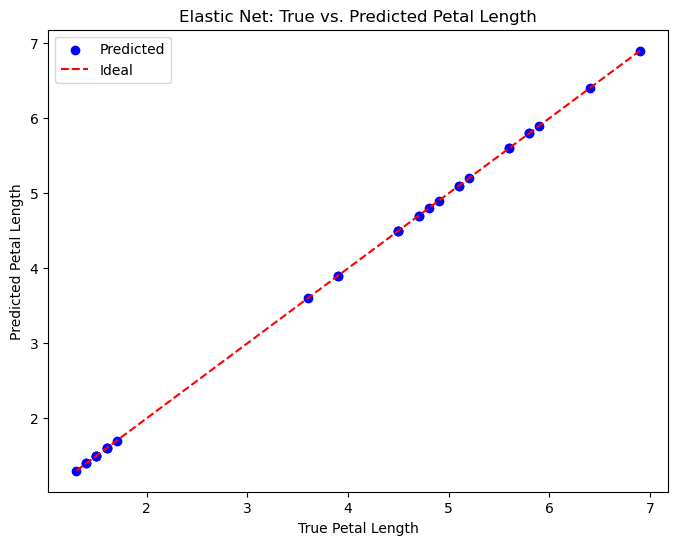

In [6]:
# Plot the true target and predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='b', label='Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--', label='Ideal')
plt.xlabel('True Petal Length')
plt.ylabel('Predicted Petal Length')
plt.title('Elastic Net: True vs. Predicted Petal Length')
plt.legend()
plt.show()
